In [12]:
%load_ext autoreload
%autoreload 2

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import sympy as sp
from sympy.abc import x, y, z
import matplotlib.pyplot as plt

In [14]:
from CauseML.utilities import random_covar_matrix

In [61]:
def plot_random_covar(d=50, k=1):
    plt.figure(figsize=(14, 6))
    cm = random_covar_matrix(d, k)
    plt.subplot(131)
    plt.title("Pair-wise correlation heatmap")
    plt.imshow(cm)

    plt.subplot(132)
    plt.title("Pair-wise correlation values distribution")
    plt.hist(cm.flatten())

    plt.subplot(133)
    plt.title("Eigenvalues")
    e_vals = np.linalg.eig(cm)[0]
    plt.scatter(range(len(e_vals)), e_vals)
    plt.show()

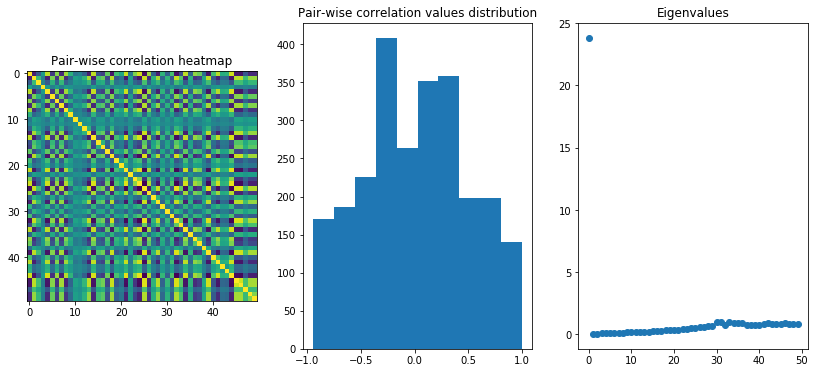

In [62]:
plot_random_covar(d=50, k=1)

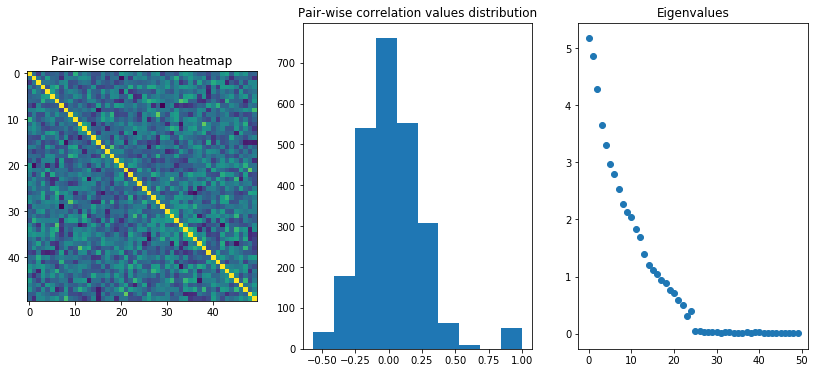

In [63]:
plot_random_covar(d=50, k=25)

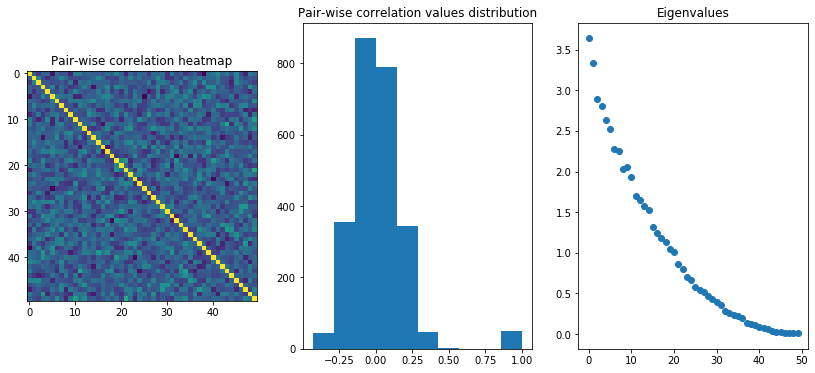

In [64]:
plot_random_covar(d=50, k=49)